Tak jak rozmawialiśmy to jest jedynie bardzo początkowe przejrzenie tych metod (dalej tej Doc2Vec wygląda dość dziwnie), ale przynajmniej wstępne wyniki wyglądają jakby miało to jakiekolwiek szanse zadziałać :D

In [15]:
import sys

sys.path.append("../")
from src.graph2vec import OurGraph2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from tqdm.notebook import tqdm

from src.utils import read_stargazers_dataset, create_logreg_model

In [2]:
without = OurGraph2Vec(window_size=0)

In [3]:
graphs, labels = read_stargazers_dataset("../datasets/github_stargazers")

In [4]:
without.fit(graphs)

In [5]:
with_dm = OurGraph2Vec(cbowlike=True)

In [6]:
with_dm.fit(graphs)

In [7]:
without.get_embedding().shape

(12725, 128)

In [8]:
with_dm.get_embedding().shape

(12725, 128)

In [9]:
labels.mean()

0.5350098231827112

In [11]:
create_logreg_model(without.get_embedding(), labels)

0.6199580932425354

In [12]:
create_logreg_model(with_dm.get_embedding(), labels)

0.5914091147197486

In [13]:
create_logreg_model(with_dm.get_embedding() + without.get_embedding(), labels)

0.5976951283394447

In [16]:
n = 1000
without_res = [0] * n
with_res = [0] * n
combined_res = [0] * n
for it in tqdm(range(n)):
    without_res[it] = create_logreg_model(without.get_embedding(), labels)
    with_res[it] = create_logreg_model(with_dm.get_embedding(), labels)
    combined_res[it] = create_logreg_model(
        with_dm.get_embedding() + without.get_embedding(), labels
    )

  0%|          | 0/1000 [00:00<?, ?it/s]

<AxesSubplot:>

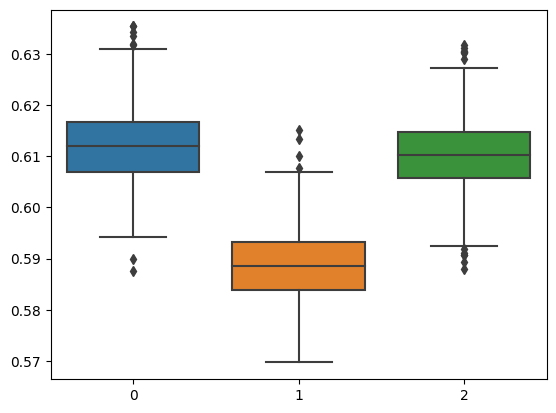

In [17]:
sns.boxplot([without_res, with_res, combined_res])